Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ISLR
Loading required package: boot


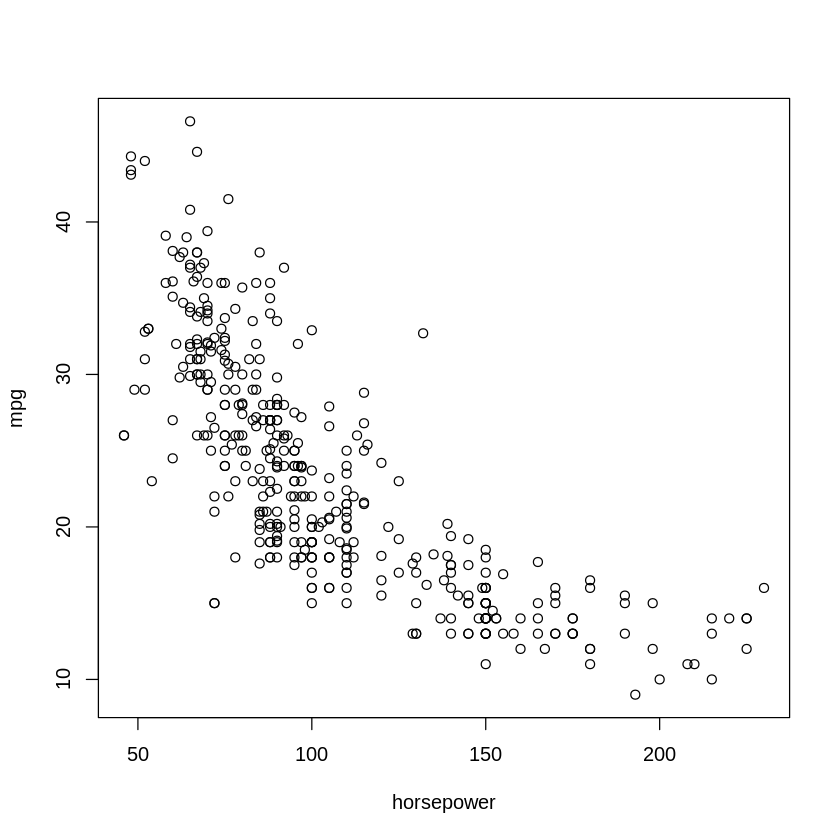

In [1]:
install.packages('ISLR') 
install.packages('MASS') 

require(ISLR)
require(boot)
?cv.glm
plot(mpg~horsepower,data=Auto)

In [2]:
# LOOCV
glm.fit=glm(mpg~horsepower, data=Auto)
cv.glm(Auto,glm.fit)$delta #pretty slow (doesnt use formula (5.2) on page 180)


[1] 24.23151 24.23114

In [3]:
##Lets write a simple function to use formula (5.2)
loocv=function(fit){
  h=lm.influence(fit)$h
  mean((residuals(fit)/(1-h))^2)
}

[1] 24.23151

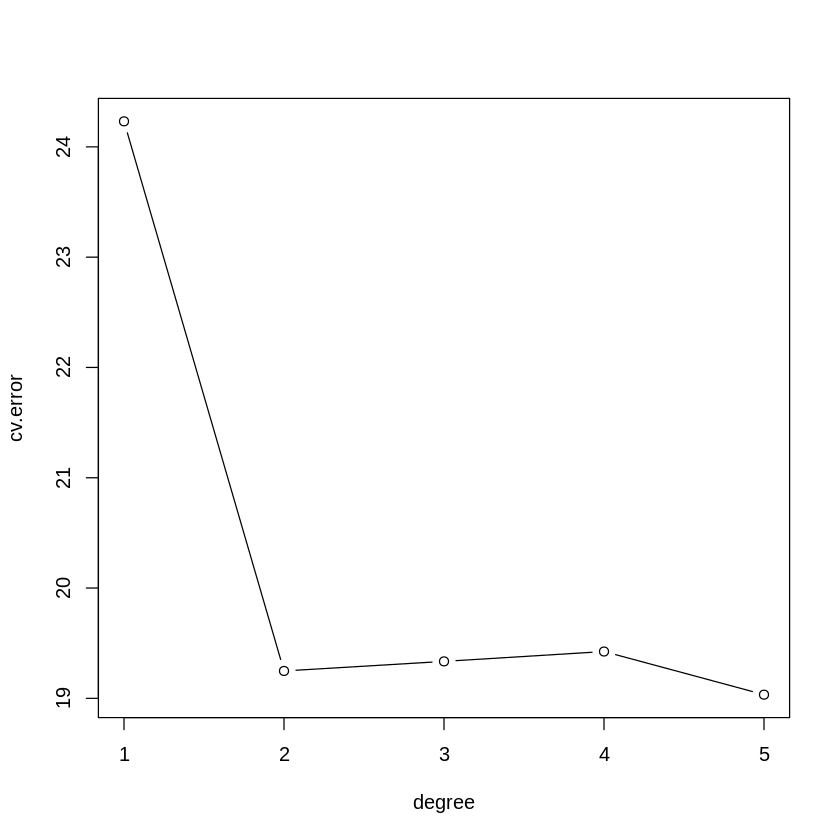

In [4]:
## Now we try it out
loocv(glm.fit)


cv.error=rep(0,5)
degree=1:5
for(d in degree){
  glm.fit=glm(mpg~poly(horsepower,d), data=Auto)
  cv.error[d]=loocv(glm.fit)
}
plot(degree,cv.error,type="b")


In [5]:
## 10-fold CV

cv.error10=rep(0,5)
for(d in degree){
  glm.fit=glm(mpg~poly(horsepower,d), data=Auto)
  cv.error10[d]=cv.glm(Auto,glm.fit,K=10)$delta[1]
}
lines(degree,cv.error10,type="b",col="red")


ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [6]:
# Bootstrap
## Minimum risk investment - Section 5.2

alpha=function(x,y){
  vx=var(x)
  vy=var(y)
  cxy=cov(x,y)
  (vy-cxy)/(vx+vy-2*cxy)
}
alpha(Portfolio$X,Portfolio$Y)


[1] 0.5758321

[1] 0.5758321

[1] 0.5963833


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

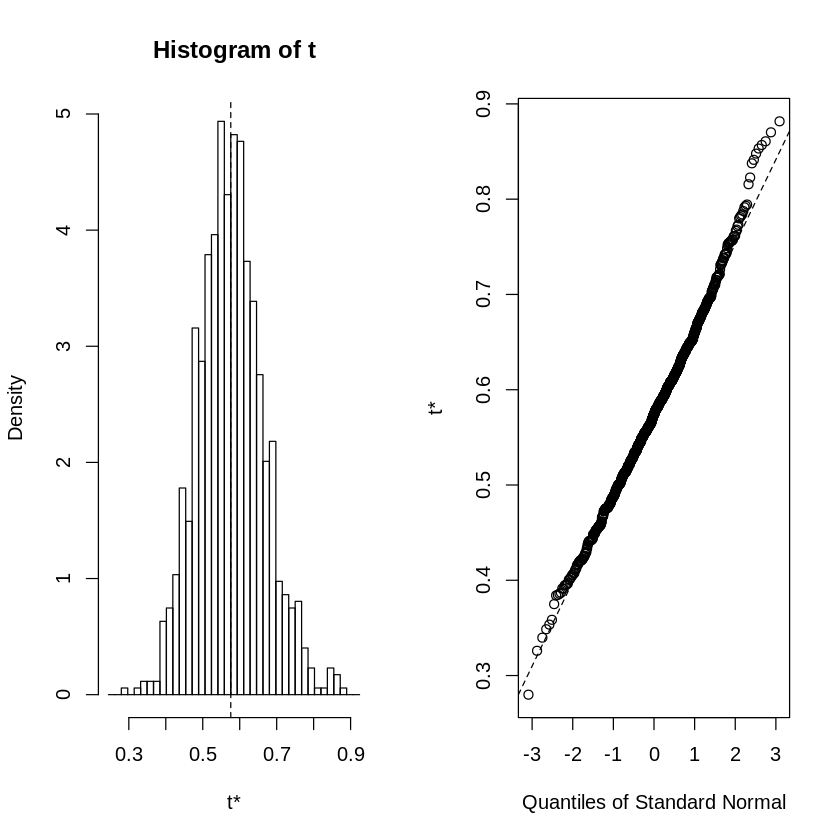

In [7]:
## What is the standard error of alpha?

alpha.fn=function(data, index){
  with(data[index,],alpha(X,Y))
}

alpha.fn(Portfolio,1:100)

set.seed(1)
alpha.fn (Portfolio,sample(1:100,100,replace=TRUE))

boot.out=boot(Portfolio,alpha.fn,R=1000)
boot.out
plot(boot.out)
